# Neural Network From Scratch

In [15]:
import os
import glob
import time
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import misc
from MyDenceNN import MyDenceNN
from IPython.display import Image

#random.seed(5)

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
pokemon_list = pd.read_csv("./archive/pokemon.csv")

In [9]:
pokemon_list.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


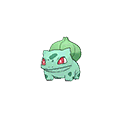

In [17]:
image_dir = "./archive/images/images/"

Image(filename=image_dir+"bulbasaur.png")

In [25]:
pokemons = pokemon_list
pokemons.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [32]:
def append_image(x, image_dir):
    try:
        image = Image(filename =  image_dir + x + ".png")
    except:
        image = Image(filename =  image_dir + x + ".jpg")
    return image

In [33]:
pokemons["Image"] = pokemons.Name.apply(lambda x: append_image(x, image_dir))

In [34]:
pokemons.head()

,Name,Type1,Type2,Image
0,bulbasaur,Grass,Poison,<IPython.core.display.Image object>
1,ivysaur,Grass,Poison,<IPython.core.display.Image object>
2,venusaur,Grass,Poison,<IPython.core.display.Image object>
3,charmander,Fire,NaN,<IPython.core.display.Image object>
4,charmeleon,Fire,NaN,<IPython.core.display.Image object>


In [37]:
pokemons["Type1"].value_counts()

Water       114
Normal      105
Grass        78
Bug          72
Psychic      53
Fire         53
Rock         46
Electric     40
Poison       34
Ground       32
Fighting     29
Dark         29
Ghost        27
Dragon       27
Steel        26
Ice          23
Fairy        18
Flying        3
Name: Type1, dtype: int64

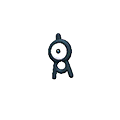

In [36]:
pokemons["Image"][]

## Load Data

In [2]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

y = 0. It's a non-cat picture.


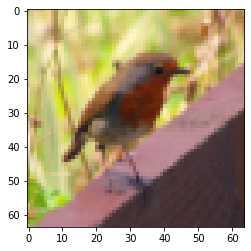

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [4]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


# Initialise Network Parameters

In [5]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [28]:
new_dence = MyDenceNN()

hidden_units = {
    "1" : 64,
    "2" : 8
}

activations = {
    "1" : "relu",
    "2" : "relu",
    "3" : "sigmoid"    
}

cost_fun = "logistic_regression"
alpha = 0.01
epochs = 2000
display=False
print_cost = True
## L2 Reg Needs Fixing
L2_reg = False
lambd = 0.01
keep_prob = 1
normalise = True
# Experiment with weighted initiation
weighted_init = False

new_dence.solve(train_x, train_y, hidden_units, activations, 
                cost_fun, alpha, epochs, display, print_cost, 
                L2_reg, lambd, keep_prob, normalise, weighted_init)

#################
Units per layer
----------------
n[1] = 64
----------------
n[2] = 8
----------------
----------------


######################################
######################################
	  Optimising Model
######################################
######################################


Epoch 100: Cost = 0.6737924117750922
--------------------------
Epoch 200: Cost = 0.6613790332133027
--------------------------
Epoch 300: Cost = 0.652211261859648
--------------------------
Epoch 400: Cost = 0.6400953213112373
--------------------------
Epoch 500: Cost = 0.6079350997453762
--------------------------
Epoch 600: Cost = 0.5447099925675205
--------------------------
Epoch 700: Cost = 0.4433332566229946
--------------------------
Epoch 800: Cost = 0.34239737178670276
--------------------------
Epoch 900: Cost = 0.275170065797247
--------------------------
Epoch 1000: Cost = 0.2363627206136584
--------------------------
Epoch 1100: Cost = 0.20722549763253734
--------------------

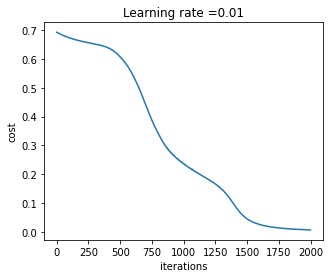

In [29]:
costs = []

for cost in new_dence.costs:
    J = np.squeeze(new_dence.costs[cost])
    costs.append(J)
    
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(alpha))
plt.show()